In [1]:
import numpy as np
import scipy
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
folder = r"C:\Users\jmlnn\OneDrive\Engenharia\0. Pesquisa DP\arquivosTP"
files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.mat')]
files

['C:\\Users\\jmlnn\\OneDrive\\Engenharia\\0. Pesquisa DP\\arquivosTP\\tp_22kv_condi_1.mat',
 'C:\\Users\\jmlnn\\OneDrive\\Engenharia\\0. Pesquisa DP\\arquivosTP\\tp_22kv_condi_2.mat',
 'C:\\Users\\jmlnn\\OneDrive\\Engenharia\\0. Pesquisa DP\\arquivosTP\\tp_22kv_condi_3.mat',
 'C:\\Users\\jmlnn\\OneDrive\\Engenharia\\0. Pesquisa DP\\arquivosTP\\tp_22kv_condi_4.mat']

In [3]:
mat_data = scipy.io.loadmat(files[0]) # carrega arquivo como dicionário
absoluto = [key for key in mat_data.keys() if not key.startswith('_')] # pega chaves que não começam com '_'


In [4]:
dict_dados_tp = {}

for i in range(len(files)):
    mat_data = scipy.io.loadmat(files[i])
    absoluto = [key for key in mat_data.keys() if not key.startswith('_')] # pega chaves que não começam com '_'
    dict_dados_tp[f'Arquivo {i+1}'] = mat_data[absoluto[0]]


In [5]:
dict_dados_tp.keys()

dict_keys(['Arquivo 1', 'Arquivo 2', 'Arquivo 3', 'Arquivo 4'])

In [104]:
class Processor:
    def __init__(self, folder: str):
        # Inicializa a classe Processor com um caminho específico de pasta
        # e.g.: tp_folder_path = r"C:\Users\jmlnn\OneDrive\Engenharia\0. Pesquisa DP\arquivosTP"
        self.folder = folder
        self.files_list = self.list_mat_files()

    def list_mat_files(self):
        """Lista os arquivos .mat no diretório especificado"""

        return [os.path.join(self.folder, f)
                for f in os.listdir(self.folder)
                if f.endswith('.mat')]
    
    def load_mat_file(self, data_dimension: int = 1):
        self.dict_data = {}
        for i, file in enumerate(self.files_list, 1):
            try:
                mat_data = scipy.io.loadmat(file)
                absoluto = [key for key in mat_data.keys() if not key.startswith('_')]
                
                if not absoluto:
                    print(f"Arquivo {i} não possui dados")
                    continue

                self.dict_data[f'Arquivo {i}'] = mat_data[absoluto[0]]

            except Exception as e:
                print(f"Erro ao carregar arquivo {file}: {e}")

        return self.dict_data # retorna um dicionário dos dados
    
    def plot_dados(self):
        plt.figure(figsize=(10, 6))
        for key, value in self.dict_data.items():
            dados = np.array(value[2:])
            plt.plot(dados)

        plt.xlabel('Pontos')
        plt.ylabel('Amplitude')
        plt.title('Dados dos arquivos .mat')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()

        return plt.show()

    def half_cycle(self, plot=True, title=""):
        """Separa os dados em semiciclos positivos e negativos"""

        data_pos = []
        data_neg = []

        lista = [np.array(value) for value in self.dict_data.values()]

        for i in range(len(lista)):
            linha_nula = np.zeros((1, lista[i].shape[1]))  # Cria uma linha de zeros
            lista[i] = np.vstack((lista[i], linha_nula))  # Adiciona a linha de zeros

            # Atribui 1 para semiciclo positivo e 0 para negativo
            lista[i][-1] = (lista[i][1] <= 180).astype(int)

            for k in range(lista[i].shape[1]):  # Percorre as colunas
                coluna = lista[i][:, k]  # Obtém a coluna completa
                if lista[i][-1, k] == 1:
                    data_pos.append(coluna)  # Adiciona a coluna na lista de positivos
                else:
                    data_neg.append(coluna)  # Adiciona a coluna na lista de negativos

        # Converte para arrays e remove a última linha
        data_pos = np.array(data_pos)[:, :-1]
        data_neg = np.array(data_neg)

                # Se o parâmetro `plot` for True, gerar os gráficos
        if plot and data_pos.size > 0 and data_neg.size > 0:
            plt.figure(figsize=(10, 5))
            plt.plot(data_pos[0][2:], label="Semiciclo Positivo", color="blue")
            plt.plot(data_neg[0][2:], label="Semiciclo Negativo", color="red")
            plt.xlabel("Pontos")
            plt.ylabel("Amplitude")
            plt.title(title)
            plt.legend()
            plt.grid(True)
            plt.show()

        return data_pos, data_neg  # Retorna os dados processados

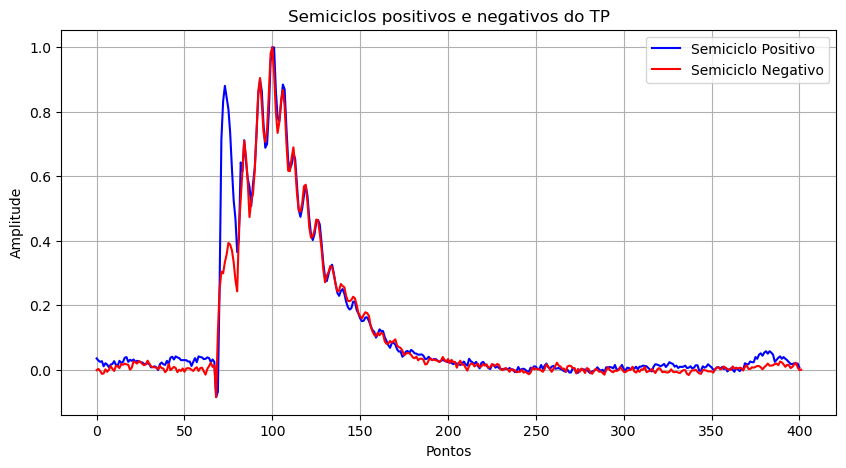

(array([[ 1.38126758e+00,  6.62201667e+01,  3.49387522e-02, ...,
          1.69101355e-02,  1.90311492e-02,  6.30506682e-03],
        [ 1.17472461e+00,  8.07068602e+01,  2.42576801e-03, ...,
         -8.79694210e-03, -1.25378455e-02, -1.12908777e-02],
        [ 1.36661914e+00,  5.12054553e+01,  9.58827170e-03, ...,
          3.15702671e-03, -3.27421828e-03,  9.58827170e-03],
        ...,
        [ 9.89636719e-01,  7.37113997e+01, -1.44584305e-02, ...,
          8.09837891e-02,  7.32868359e-02,  8.40625704e-02],
        [ 1.37811328e+00,  7.27771817e+01, -1.53912869e-03, ...,
         -1.25936445e-02, -7.06638657e-03,  6.71774464e-04],
        [ 1.33393359e+00,  4.88407150e+01,  2.12511751e-02, ...,
          3.26718148e-02,  3.72400707e-02,  2.81035589e-02]]),
 array([[ 1.15128711e+00,  2.30769044e+02, -1.34190842e-03, ...,
          7.56456344e-03, -1.34190842e-03,  0.00000000e+00],
        [ 9.28630859e-01,  2.68284198e+02,  2.04202676e-02, ...,
         -1.42830402e-02, -9.55077093e

In [109]:
tp_folder_path = r"C:\Users\jmlnn\OneDrive\Engenharia\0. Pesquisa DP\arquivosTP"
tp_processor = Processor(tp_folder_path)
tp_processor.list_mat_files()
tp_processor.load_mat_file()
tp_processor.half_cycle(title="Semiciclos positivos e negativos do TP")

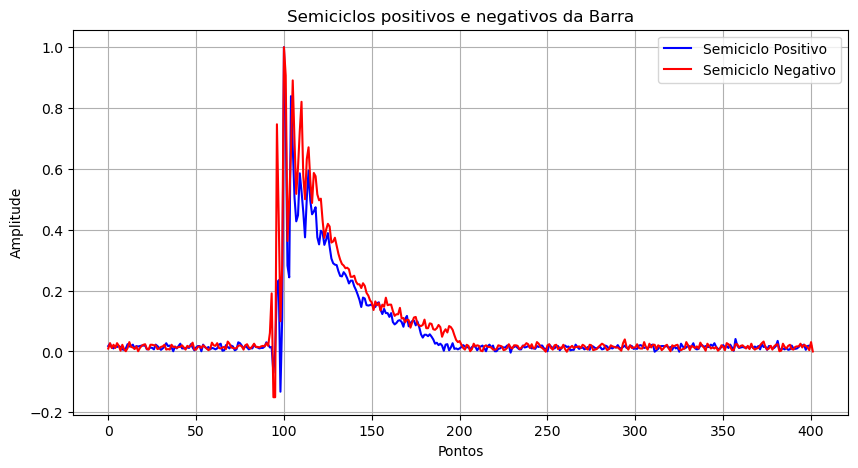

(array([[ 1.26266406e-01,  2.42780885e+01,  1.77637807e-02, ...,
          1.77637807e-02,  1.93106094e-02,  1.77637807e-02],
        [ 1.07125781e-01,  4.71812595e+01,  2.64073337e-02, ...,
          1.18216758e-02, -9.40774910e-04,  4.52884681e-03],
        [ 9.69695313e-02,  7.35990319e+01,  2.51448184e-02, ...,
          2.71589820e-02,  7.01734600e-03,  1.70881640e-02],
        ...,
        [ 3.43613281e-01,  5.60060794e+01, -4.01864377e-02, ...,
         -1.46080827e-02, -1.17660432e-02, -3.73443982e-02],
        [ 3.41660156e-01,  4.40022133e+01,  1.96078432e-02, ...,
          1.13931287e-01,  7.96318528e-02,  5.67655635e-02],
        [ 2.22519531e-01,  4.50886984e+01,  7.39928027e-02, ...,
         -9.39173162e-03,  1.69402266e-02,  3.01062057e-02]]),
 array([[ 1.11032031e-01,  2.03379397e+02,  9.64670952e-03, ...,
          4.36951614e-03,  3.07554830e-02,  0.00000000e+00],
        [ 1.45797656e-01,  2.23703278e+02,  1.67237342e-02, ...,
          1.67237342e-02,  1.27048939e

In [108]:
barra_folder_path = r"C:\Users\jmlnn\OneDrive\Engenharia\0. Pesquisa DP\arquivos"
barra_processor = Processor(barra_folder_path)
barra_processor.list_mat_files()
barra_processor.load_mat_file()
barra_processor.half_cycle(title="Semiciclos positivos e negativos da Barra")

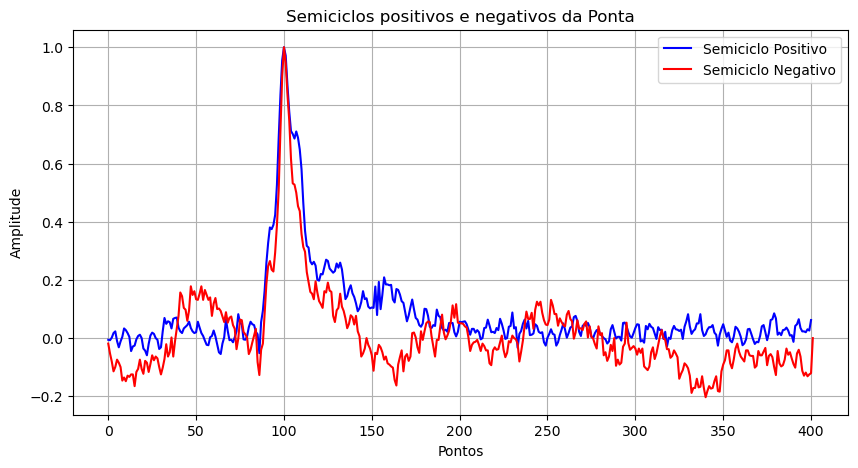

(array([[ 2.37229492e-01,  8.69679507e+01, -5.66846283e-03, ...,
          3.03511813e-02,  2.60288240e-02,  6.20484680e-02],
        [ 3.01829102e-01,  7.20894149e+01, -1.12497695e-02, ...,
         -3.38981406e-02, -3.05008849e-02, -5.88113488e-02],
        [ 1.77415039e-01,  9.28799437e+01, -1.21245314e-01, ...,
          3.86573679e-02,  7.71881347e-02,  1.25351593e-01],
        ...,
        [ 1.08745117e-01,  1.26550019e+02, -1.98913385e-02, ...,
          6.47927798e-02,  1.53158816e-01,  8.32023708e-02],
        [ 1.37573242e-01,  1.27232053e+02,  2.02555457e-01, ...,
          3.18970719e-01,  2.57852706e-01,  2.14196983e-01],
        [ 1.24360352e-01,  1.28446493e+02,  1.48023087e-02, ...,
         -9.14445012e-02, -3.99308964e-02,  5.14350779e-03]]),
 array([[ 1.61350586e-01,  2.66881663e+02, -1.89259364e-02, ...,
         -1.24843393e-01, -1.20606695e-01,  0.00000000e+00],
        [ 1.61692383e-01,  2.59115035e+02, -1.01326907e-01, ...,
         -3.15691568e-02, -6.75049676e

In [110]:
ponta_folder_path = r"C:\Users\jmlnn\OneDrive\Engenharia\0. Pesquisa DP\ponta"
ponta_processor = Processor(ponta_folder_path)
ponta_processor.list_mat_files()
ponta_processor.load_mat_file()
ponta_processor.half_cycle(title="Semiciclos positivos e negativos da Ponta")